<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/HOML_Exercise_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
print(olivetti['data'].shape, olivetti['target'].shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096) (400,)


In [4]:
#10
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]



strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)

train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [5]:
#차원 줄이기
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_



199

In [6]:
#PCA 적용 모델
from sklearn.cluster import KMeans
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmean)


In [7]:
#PCA 적용 안한 모델
from sklearn.cluster import KMeans
full_k_range = range(95, 120, 5)
full_kmeans_per_k = []
for k in full_k_range:
    kmean = KMeans(n_clusters=k, random_state=42).fit(X_train)
    full_kmeans_per_k.append(kmean)

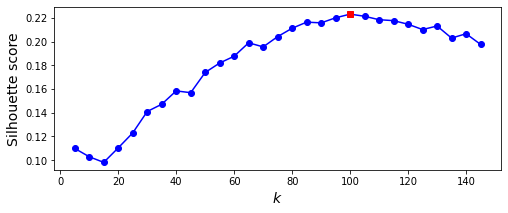

100


In [8]:
#Kmean 의 실루엣 점수를 측정하고, 최고점수 k 를 찾는다.
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()
print(best_k)

0


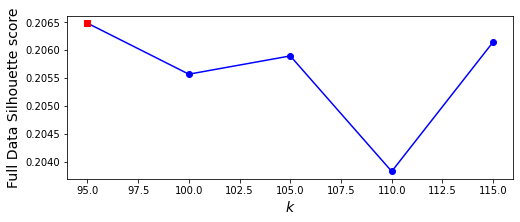

95


In [9]:
#Kmean 의 실루엣 점수를 측정하고, 최고점수 k 를 찾는다.
#pca 수행하지 않은 모델
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in full_kmeans_per_k]
print(np.argmax(silhouette_scores))
full_best_index = np.argmax(silhouette_scores)
full_best_k = full_k_range[full_best_index]
full_best_score = silhouette_scores[full_best_index]

plt.figure(figsize=(8, 3))
plt.plot(full_k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Full Data Silhouette score", fontsize=14)
plt.plot(full_best_k, full_best_score, "rs")
plt.show()
print(full_best_k)

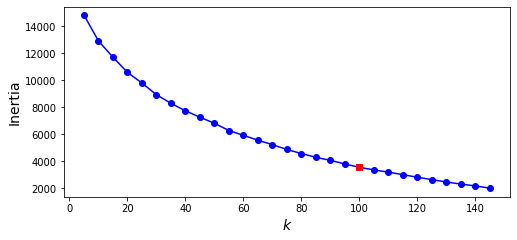

In [10]:
#모든 모델의 이니셔 그래프 작성
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

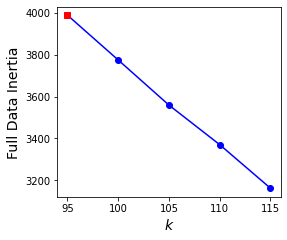

In [11]:
full_inertias = [model.inertia_ for model in full_kmeans_per_k]
full_best_inertia = full_inertias[full_best_index]

plt.figure(figsize=(4, 3.5))
plt.plot(full_k_range, full_inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Full Data Inertia", fontsize=14)
plt.plot(full_best_k, full_best_inertia, "rs")
plt.show()

100
Cluster 0


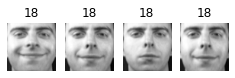

Cluster 1


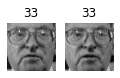

Cluster 2


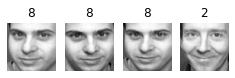

Cluster 3


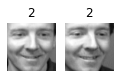

Cluster 4


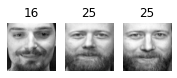

Cluster 5


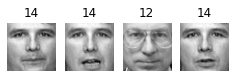

Cluster 6


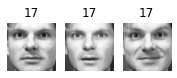

Cluster 7


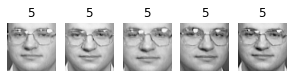

Cluster 8


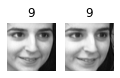

Cluster 9


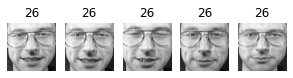

Cluster 10


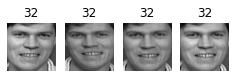

Cluster 11


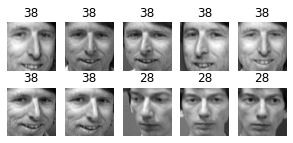

Cluster 12


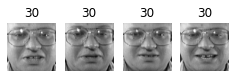

Cluster 13


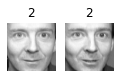

Cluster 14


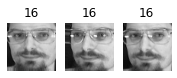

Cluster 15


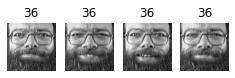

Cluster 16


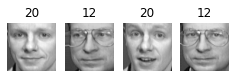

Cluster 17


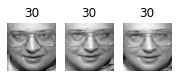

Cluster 18


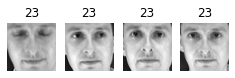

Cluster 19


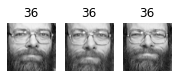

Cluster 20


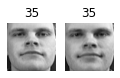

Cluster 21


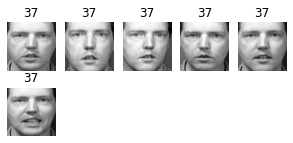

Cluster 22


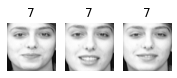

Cluster 23


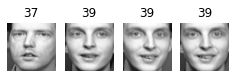

Cluster 24


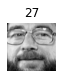

Cluster 25


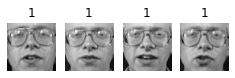

Cluster 26


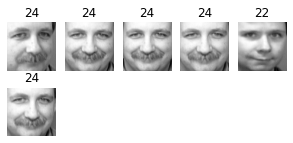

Cluster 27


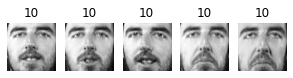

Cluster 28


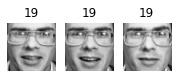

Cluster 29


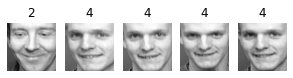

Cluster 30


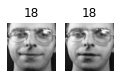

Cluster 31


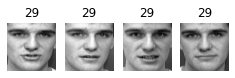

Cluster 32


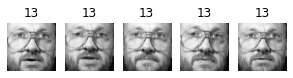

Cluster 33


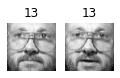

Cluster 34


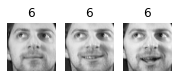

Cluster 35


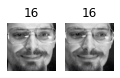

Cluster 36


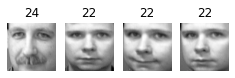

Cluster 37


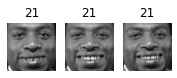

Cluster 38


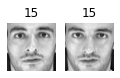

Cluster 39


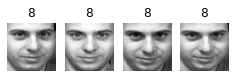

Cluster 40


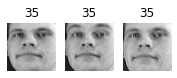

Cluster 41


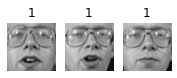

Cluster 42


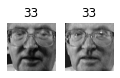

Cluster 43


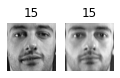

Cluster 44


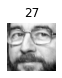

Cluster 45


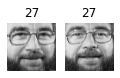

Cluster 46


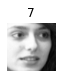

Cluster 47


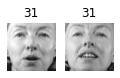

Cluster 48


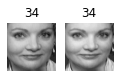

Cluster 49


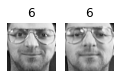

Cluster 50


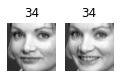

Cluster 51


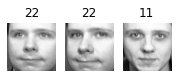

Cluster 52


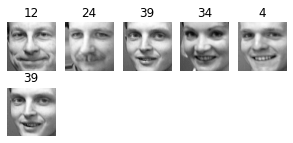

Cluster 53


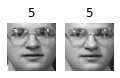

Cluster 54


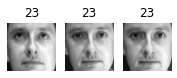

Cluster 55


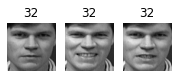

Cluster 56


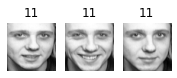

Cluster 57


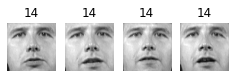

Cluster 58


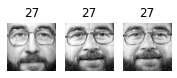

Cluster 59


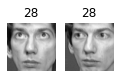

Cluster 60


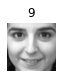

Cluster 61


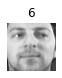

Cluster 62


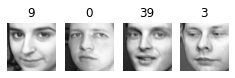

Cluster 63


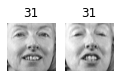

Cluster 64


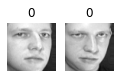

Cluster 65


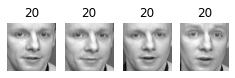

Cluster 66


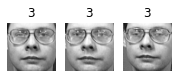

Cluster 67


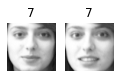

Cluster 68


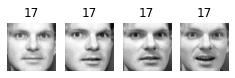

Cluster 69


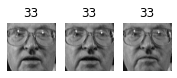

Cluster 70


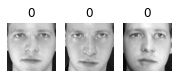

Cluster 71


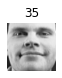

Cluster 72


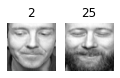

Cluster 73


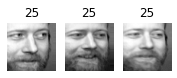

Cluster 74


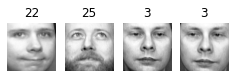

Cluster 75


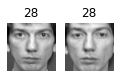

Cluster 76


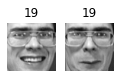

Cluster 77


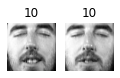

Cluster 78


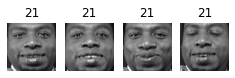

Cluster 79


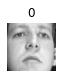

Cluster 80


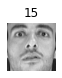

Cluster 81


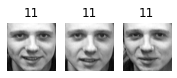

Cluster 82


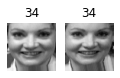

Cluster 83


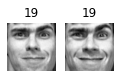

Cluster 84


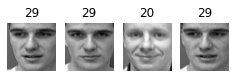

Cluster 85


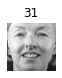

Cluster 86


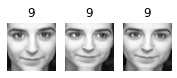

Cluster 87


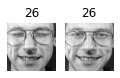

Cluster 88


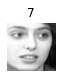

Cluster 89


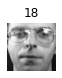

Cluster 90


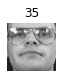

Cluster 91


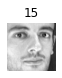

Cluster 92


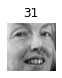

Cluster 93


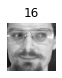

Cluster 94


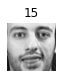

Cluster 95


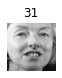

Cluster 96


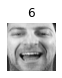

Cluster 97


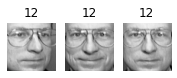

Cluster 98


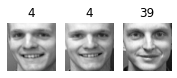

Cluster 99


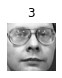

In [12]:
#best k 을 가진 모델의 각 클러스터에 동일한 사람이 있는지 확인한다.
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

best_model = kmeans_per_k[best_index]
print(len(np.unique(best_model.labels_)))
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)


95
Cluster 0


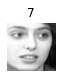

Cluster 1


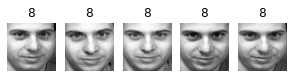

Cluster 2


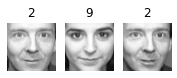

Cluster 3


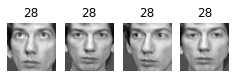

Cluster 4


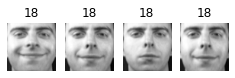

Cluster 5


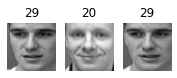

Cluster 6


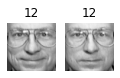

Cluster 7


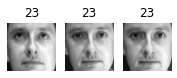

Cluster 8


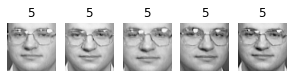

Cluster 9


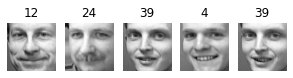

Cluster 10


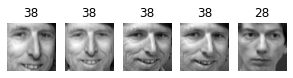

Cluster 11


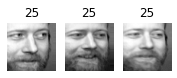

Cluster 12


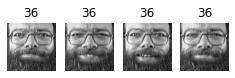

Cluster 13


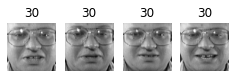

Cluster 14


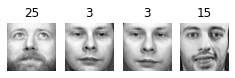

Cluster 15


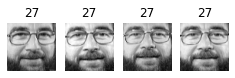

Cluster 16


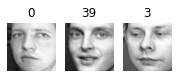

Cluster 17


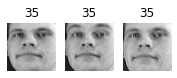

Cluster 18


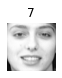

Cluster 19


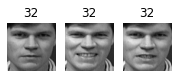

Cluster 20


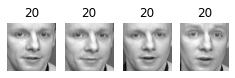

Cluster 21


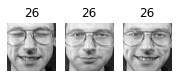

Cluster 22


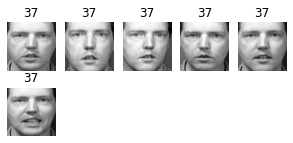

Cluster 23


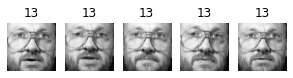

Cluster 24


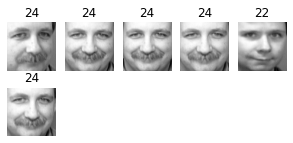

Cluster 25


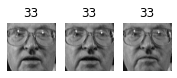

Cluster 26


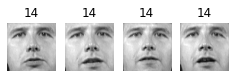

Cluster 27


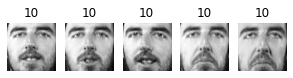

Cluster 28


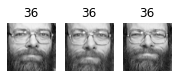

Cluster 29


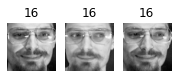

Cluster 30


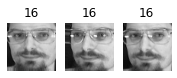

Cluster 31


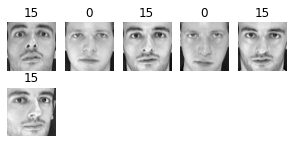

Cluster 32


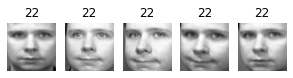

Cluster 33


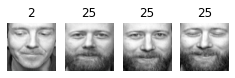

Cluster 34


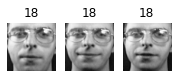

Cluster 35


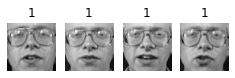

Cluster 36


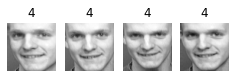

Cluster 37


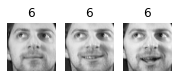

Cluster 38


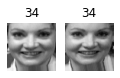

Cluster 39


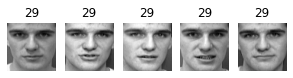

Cluster 40


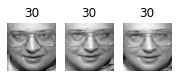

Cluster 41


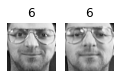

Cluster 42


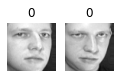

Cluster 43


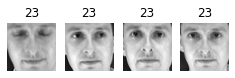

Cluster 44


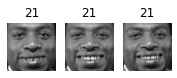

Cluster 45


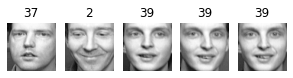

Cluster 46


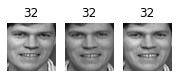

Cluster 47


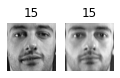

Cluster 48


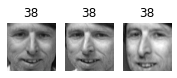

Cluster 49


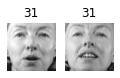

Cluster 50


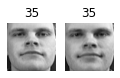

Cluster 51


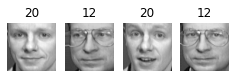

Cluster 52


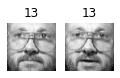

Cluster 53


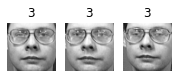

Cluster 54


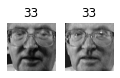

Cluster 55


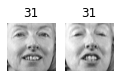

Cluster 56


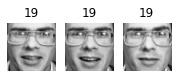

Cluster 57


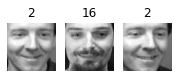

Cluster 58


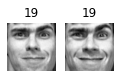

Cluster 59


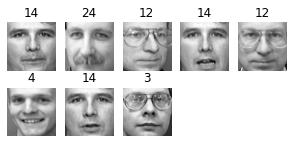

Cluster 60


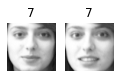

Cluster 61


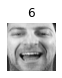

Cluster 62


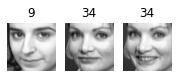

Cluster 63


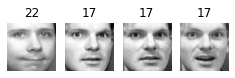

Cluster 64


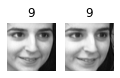

Cluster 65


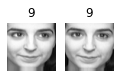

Cluster 66


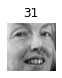

Cluster 67


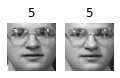

Cluster 68


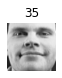

Cluster 69


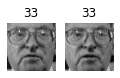

Cluster 70


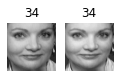

Cluster 71


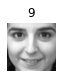

Cluster 72


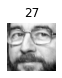

Cluster 73


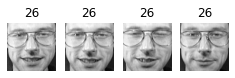

Cluster 74


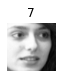

Cluster 75


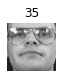

Cluster 76


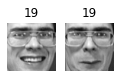

Cluster 77


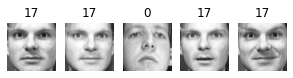

Cluster 78


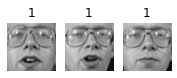

Cluster 79


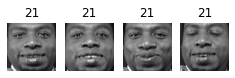

Cluster 80


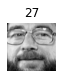

Cluster 81


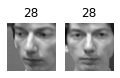

Cluster 82


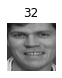

Cluster 83


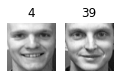

Cluster 84


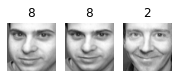

Cluster 85


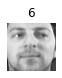

Cluster 86


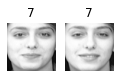

Cluster 87


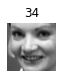

Cluster 88


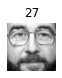

Cluster 89


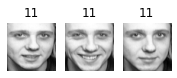

Cluster 90


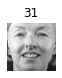

Cluster 91


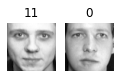

Cluster 92


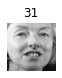

Cluster 93


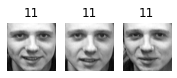

Cluster 94


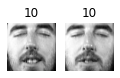

In [13]:
full_best_model = full_kmeans_per_k[full_best_index]
print(len(np.unique(full_best_model.labels_)))
for cluster_id in np.unique(full_best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = full_best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [14]:
#11

from sklearn.ensemble import RandomForestClassifier

#pca 만 진행한 데이터셋
rnf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnf_clf.fit(X_train_pca, y_train)
print(rnf_clf.score(X_valid_pca, y_valid))

rnf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnf_clf.fit(X_train, y_train)
print(rnf_clf.score(X_valid, y_valid))

0.9
0.9375


In [15]:
#군집을 사용한 데이터셋


#PCA 적용후 군집
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
print(clf.score(X_valid_reduced, y_valid))


#생 데이터에  군집
X_train_reduced = full_best_model.transform(X_train)
X_valid_reduced = full_best_model.transform(X_valid)
X_test_reduced = full_best_model.transform(X_test)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
print(clf.score(X_valid_reduced, y_valid))


0.75
0.825


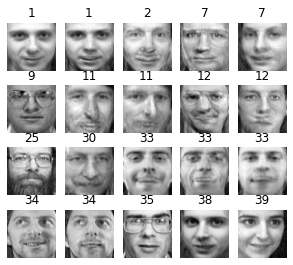

In [16]:
#12

from sklearn.mixture import GaussianMixture


#WITH PCA
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

plot_faces(gen_faces, y_gen_faces)


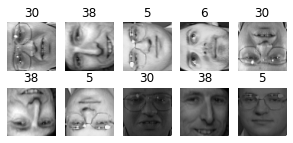

In [17]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])


X_bad_faces_pca = pca.transform(X_bad_faces)

plot_faces(X_bad_faces, y_bad)

In [20]:
print(best_model.predict(X_bad_faces_pca))

[12 78  7 79 12 11  7 78 78 78]


In [22]:
print(gm.score_samples(X_bad_faces_pca))
print(gm.score_samples(X_train_pca[:10]))

[-1.79997525e+07 -2.26427439e+07 -3.96415313e+07 -4.60254285e+07
 -3.13975266e+07 -1.39330558e+07 -2.90882810e+07 -1.06298596e+08
 -1.20931006e+08 -7.49740011e+07]
[1163.02020956 1149.1668233  1148.47710475 1170.67602814 1088.46009646
 1075.71700265 1075.717007   1088.46009022 1096.4260975  1119.6862695 ]


In [28]:
#13 

def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstruct = pca.inverse_transform(X_pca)
    return np.square(X_reconstruct - X).mean(axis=-1)

print(reconstruction_errors(pca, X_train).mean())

print(reconstruction_errors(pca, X_bad_faces).mean())

0.0001920535
0.004707354


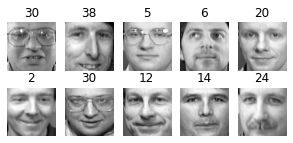

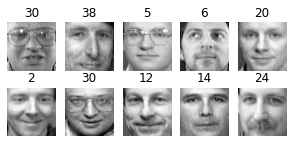

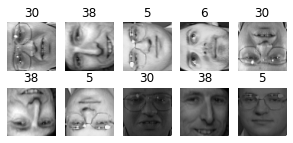

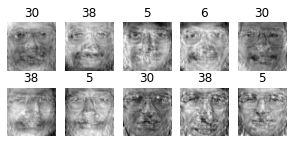

In [41]:
plot_faces(X_train[:10].copy(), y_train[:10])
X_faces_reconstructed = pca.inverse_transform(X_train_pca[:10])
plot_faces(X_faces_reconstructed, y_train[:10])

plot_faces(X_bad_faces, y_bad)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)